In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
dataset = pd.read_excel('/content/drive/MyDrive/UFF/dados chia resumo.xlsx')
tempo = np.arange(0,121,30)
tempo_sim = np.arange(0,181,30)
#dados = {'teor de agua':np.array([1, 2, 3, 4], 'massa especifica':[4,5,6,7])}
#dados = pd.DataFrame(dados)
#dados.head()

In [ ]:
dataset.head(10)

,teor de água (% b.u.),massa específica aparente (kg m-3),condutividade elétrica (mS cm-1 g-1),extrato etéreo (mg g-1),teor de proteína (mg kg-1)
0,8.540000,687.35,171.33,224.50,33.69
1,8.204664,687.19,171.43,283.90,32.68
2,7.850532,688.08,124.00,313.77,29.69
3,7.850532,688.96,124.10,319.85,33.03
4,7.616865,689.85,111.34,324.55,31.54
5,8.540000,687.35,171.33,224.50,33.69
6,7.650400,689.21,171.44,268.50,31.51
7,7.392607,690.51,110.89,269.43,30.11
8,7.392607,691.76,113.06,293.07,32.57
9,7.095517,693.03,114.28,316.55,31.36


#Teor de água

**Regressão Linear**

In [ ]:
var = []
var.append(np.array(dataset['teor de água (% b.u.)'][0:5]))
var.append(np.array(dataset['teor de água (% b.u.)'][5:10]))
slope_list=[]
intercept_list = []
r_value_list = []
p_value_list = []
std_err_list = []
var_sim_list = []
for i in range(0,2):
  slope, intercept, r_value, p_value, std_err = stats.linregress(tempo,var[i])
  slope_list.append(slope)
  intercept_list.append(intercept)
  r_value_list.append(round(r_value**(2),4))
  p_value_list.append(p_value)
  std_err_list.append(std_err)
  var_sim = intercept_list[i] + slope_list[i]*np.array(tempo_sim)
  var_sim_list.append(var_sim)
#print('R² = %.4f' % (r_value**(2)))

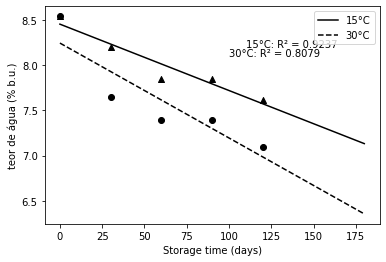

In [ ]:
plt.scatter(tempo, var[0],marker='^',c='black')
plt.scatter(tempo, var[1],marker='o',c='black')
plt.plot(tempo_sim,var_sim_list[0],c='black', label='15°C')
plt.plot(tempo_sim,var_sim_list[1],c='black',linestyle='dashed', label='30°C')
plt.xlabel('Storage time (days)') ##
plt.ylabel('teor de água (% b.u.)') ##
plt.legend()
plt.text(110, 8.2,'15°C: R² = '+str(r_value_list[0])) ##
plt.text(100,8.1,'30°C: R² = '+str(r_value_list[1])) ##
plt.show()

**Regressão Polinomial**

In [ ]:
from sklearn.metrics import r2_score
from scipy.interpolate import make_interp_spline, BSpline

coeffs_list = []
var_sim2_list = []
var_sim_smooth = []
r2_list = []
for i in range(0,2):
  coeffs_list.append(np.polyfit(tempo, var[i], 2))
  var_sim2 = coeffs_list[i][0]*tempo_sim**(2) + coeffs_list[i][1]*tempo_sim + coeffs_list[i][2]
  var_sim2_list.append(var_sim2)
  xnew = np.linspace(tempo_sim.min(), tempo_sim.max(), 200)
  spl = make_interp_spline(tempo_sim, var_sim2, k=3)
  var_sim_smooth.append(spl(xnew))
  r2_list.append(round(r2_score(var[i], var_sim2[0:len(var[i])]),4))
r2_list
#print('w = %.7fX² + %.4fX + %.4f' % (a15_x[0],a15_x[1],a15_x[2]))

[0.966, 0.9292]

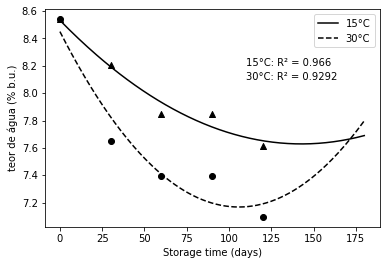

In [ ]:
plt.scatter(tempo, var[0], c='black', marker='^')
plt.scatter(tempo, var[1], c='black', marker='o')
plt.plot(xnew, var_sim_smooth[0], c='black',label='15°C')
plt.plot(xnew, var_sim_smooth[1], c='black', linestyle='dashed',label='30°C')
plt.xlabel('Storage time (days)') ##
plt.ylabel('teor de água (% b.u.)') ##
plt.legend()
plt.text(110,8.2,'15°C: R² = '+str(r2_list[0])) ##
plt.text(110,8.1,'30°C: R² = '+str(r2_list[1])) ##
plt.show()

Lucas Oliveira Mendes da Silva\
Universidade Federal de Alagoas\
Engenharia Química\
lucas.mendes@ctec.ufal.br